<a href="https://colab.research.google.com/github/SuryaTeja-aiml/GenAi_2303a52007/blob/main/2303A52007_GenAi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider a chocolate manufacturing company that produces only two
types of chocolate i.e. A and B. Both the chocolates require Milk
and Choco only.
To manufacture each unit of A and B, the following quantities are
required:

Each unit of A requires 1 unit of Milk and 3 units of Choco

Each unit of B requires 1 unit of Milk and 2 units of Choco

The company kitchen has a total of 5 units of Milk and 12 units of
Choco. On each sale, the company makes a profit of Rs 6 per unit A
sold and Rs 5 per unit B sold.
Now, the company wishes to maximize its profit. How many units of
A and B should it produce respectively?

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function (negative because linprog minimizes)
c = [-6, -5]

# Coefficients of the inequality constraints (Ax <= b)
A = [
    [1, 1],  # Milk constraint
    [3, 2],  # Choco constraint
]
b = [5, 12]

# Bounds for each variable (x >= 0, y >= 0)
x_bounds = [(0, None), (0, None)]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Display constraints and results
print("Constraints:")
print("1. Milk constraint: x + y <= 5")
print("2. Choco constraint: 3x + 2y <= 12")
print("3. Non-negativity constraint: x, y >= 0\n")

# Display results
if result.success:
    print(f"Optimal production of x (Chocolate A): {result.x[0]} units")
    print(f"Optimal production of y (Chocolate B): {result.x[1]} units")
    print(f"Maximum profit: Rs {-result.fun}")
else:
    print("No optimal solution found.")

Constraints:
1. Milk constraint: x + y <= 5
2. Choco constraint: 3x + 2y <= 12
3. Non-negativity constraint: x, y >= 0

Optimal production of x (Chocolate A): 2.0 units
Optimal production of y (Chocolate B): 3.0 units
Maximum profit: Rs 27.0


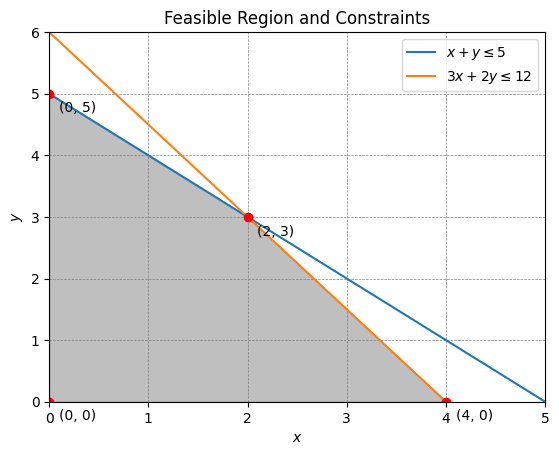

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
x = np.linspace(0, 5, 400)

# Plot the constraints
plt.plot(x, 5 - x, label='$x + y \leq 5$')
plt.plot(x, (12 - 3 * x) / 2, label='$3x + 2y \leq 12$')

# Shading the feasible region
plt.fill_between(x, 0, np.minimum(5 - x, (12 - 3 * x) / 2), where=(x >= 0) & (x <= 4), color='gray', alpha=0.5)

# Mark the vertices of the feasible region
vertices = [(0, 0), (4, 0), (2, 3), (0, 5)]
for vertex in vertices:
    plt.plot(*vertex, 'ro') # plot each vertex
    plt.text(vertex[0] + 0.1, vertex[1] - 0.3, f'({vertex[0]}, {vertex[1]})')

# Labels and title
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Feasible Region and Constraints')

plt.show()

A farmer has recently acquired a 100 hectares piece of land. He has decided to grow Wheat and Barley on that land. Due to the quality of the sun and the region's excellent climate, the entire production of Wheat and Barley can be sold. He wants to know how to plant each variety in the 100 hectares, given the costs, net profits, and labor requirements according to the data shown below:

Crop	Cost (Rs/Hec) Profit (Price/Hec)	Man-days/Hec

Wheat 7000	50	10

Barley	2000	120	30

The farmer has a budget of Rs. 7,00,000 and availability of 1,200 man-days during the planning horizon. Find the optimal solution and the optimal value.

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function (negative because linprog minimizes)
c = [-50, -120]

# Coefficients of the inequality constraints (Ax <= b)
A = [
    [1, 1],          # Land constraint
    [7000, 2000],    # Budget constraint
    [10, 30],        # Labor constraint
]
b = [100, 700000, 1200]

# Bounds for each variable (x >= 0, y >= 0)
x_bounds = [(0, None), (0, None)]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Display constraints and results
print("Constraints:")
print("1. Land constraint: x + y <= 100")
print("2. Budget constraint: 7000x + 2000y <= 700000")
print("3. Labor constraint: 10x + 30y <= 1200")
print("4. Non-negativity constraint: x, y >= 0\n")

# Display results
if result.success:
    print(f"Optimal allocation for Wheat (x): {result.x[0]} hectares")
    print(f"Optimal allocation for Barley (y): {result.x[1]} hectares")
    print(f"Maximum profit: Rs {-result.fun}")
else:
    print("No optimal solution found.")

Constraints:
1. Land constraint: x + y <= 100
2. Budget constraint: 7000x + 2000y <= 700000
3. Labor constraint: 10x + 30y <= 1200
4. Non-negativity constraint: x, y >= 0

Optimal allocation for Wheat (x): 89.99999999999997 hectares
Optimal allocation for Barley (y): 10.000000000000005 hectares
Maximum profit: Rs 5699.999999999999


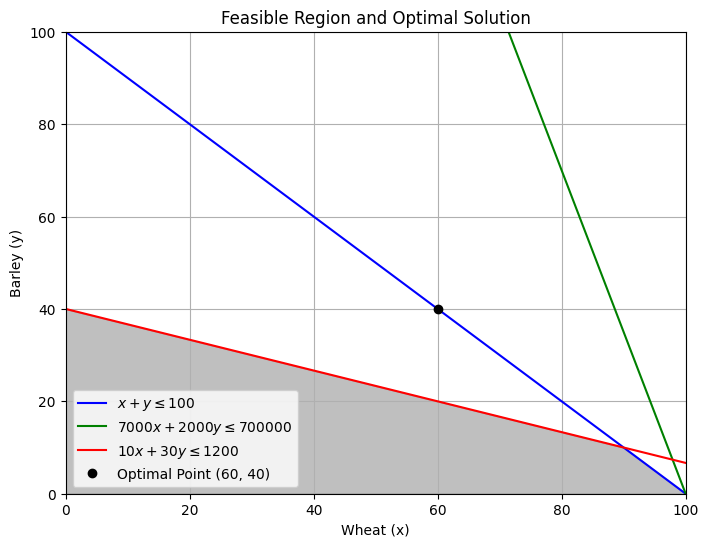

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x range for Wheat (x)
x = np.linspace(0, 100, 400)

# Constraints equations
y_land = 100 - x  # Land constraint: x + y <= 100
y_budget = (700000 - 7000 * x) / 2000  # Budget constraint: 7000x + 2000y <= 700000
y_labor = (1200 - 10 * x) / 30  # Labor constraint: 10x + 30y <= 1200

# Plot the constraints
plt.figure(figsize=(8, 6))
plt.plot(x, y_land, label=r'$x + y \leq 100$', color='blue')
plt.plot(x, y_budget, label=r'$7000x + 2000y \leq 700000$', color='green')
plt.plot(x, y_labor, label=r'$10x + 30y \leq 1200$', color='red')

# Fill the feasible region
plt.fill_between(x, 0, np.minimum(np.minimum(y_land, y_budget), y_labor), where=(x >= 0) & (x <= 100), color='gray', alpha=0.5)

# Optimal point (from the linprog result)
optimal_x = 60  # Based on the previous result
optimal_y = 40  # Based on the previous result
plt.plot(optimal_x, optimal_y, 'ko', label=f'Optimal Point ({optimal_x}, {optimal_y})')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Wheat (x)')
plt.ylabel('Barley (y)')
plt.title('Feasible Region and Optimal Solution')
plt.grid(True)
plt.legend()
plt.show()

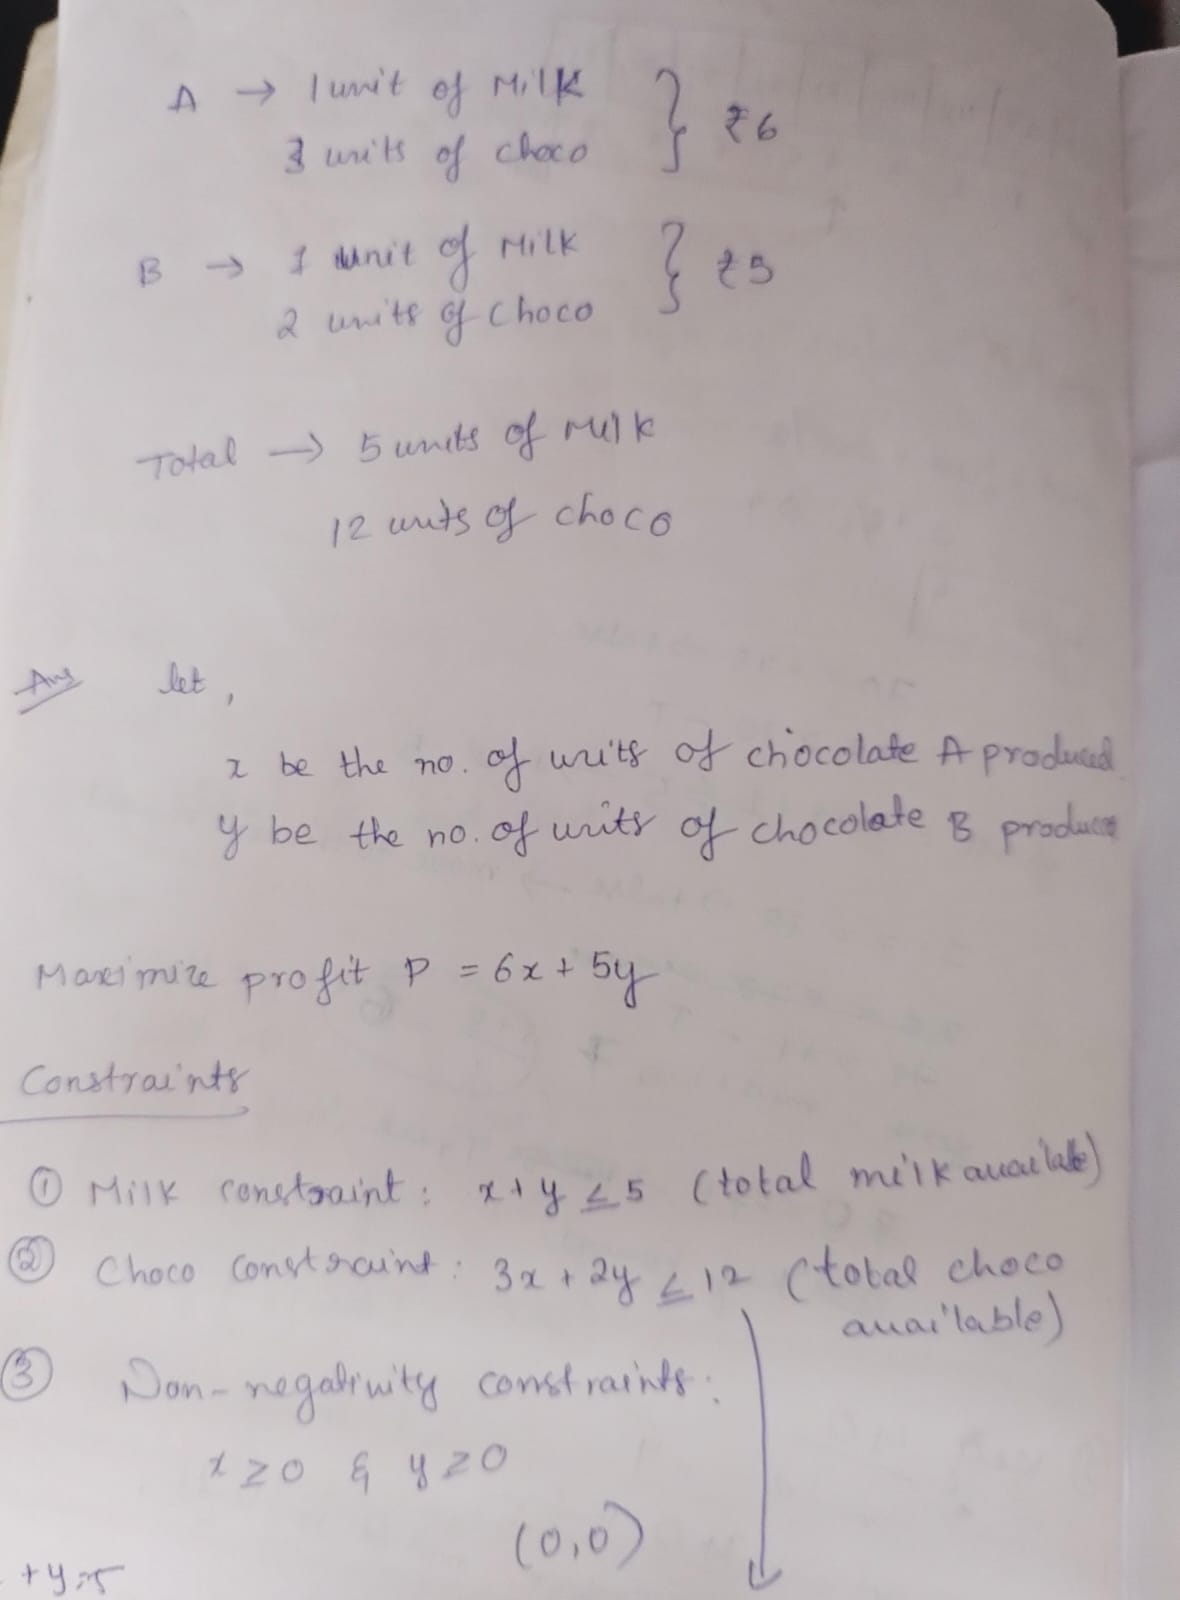

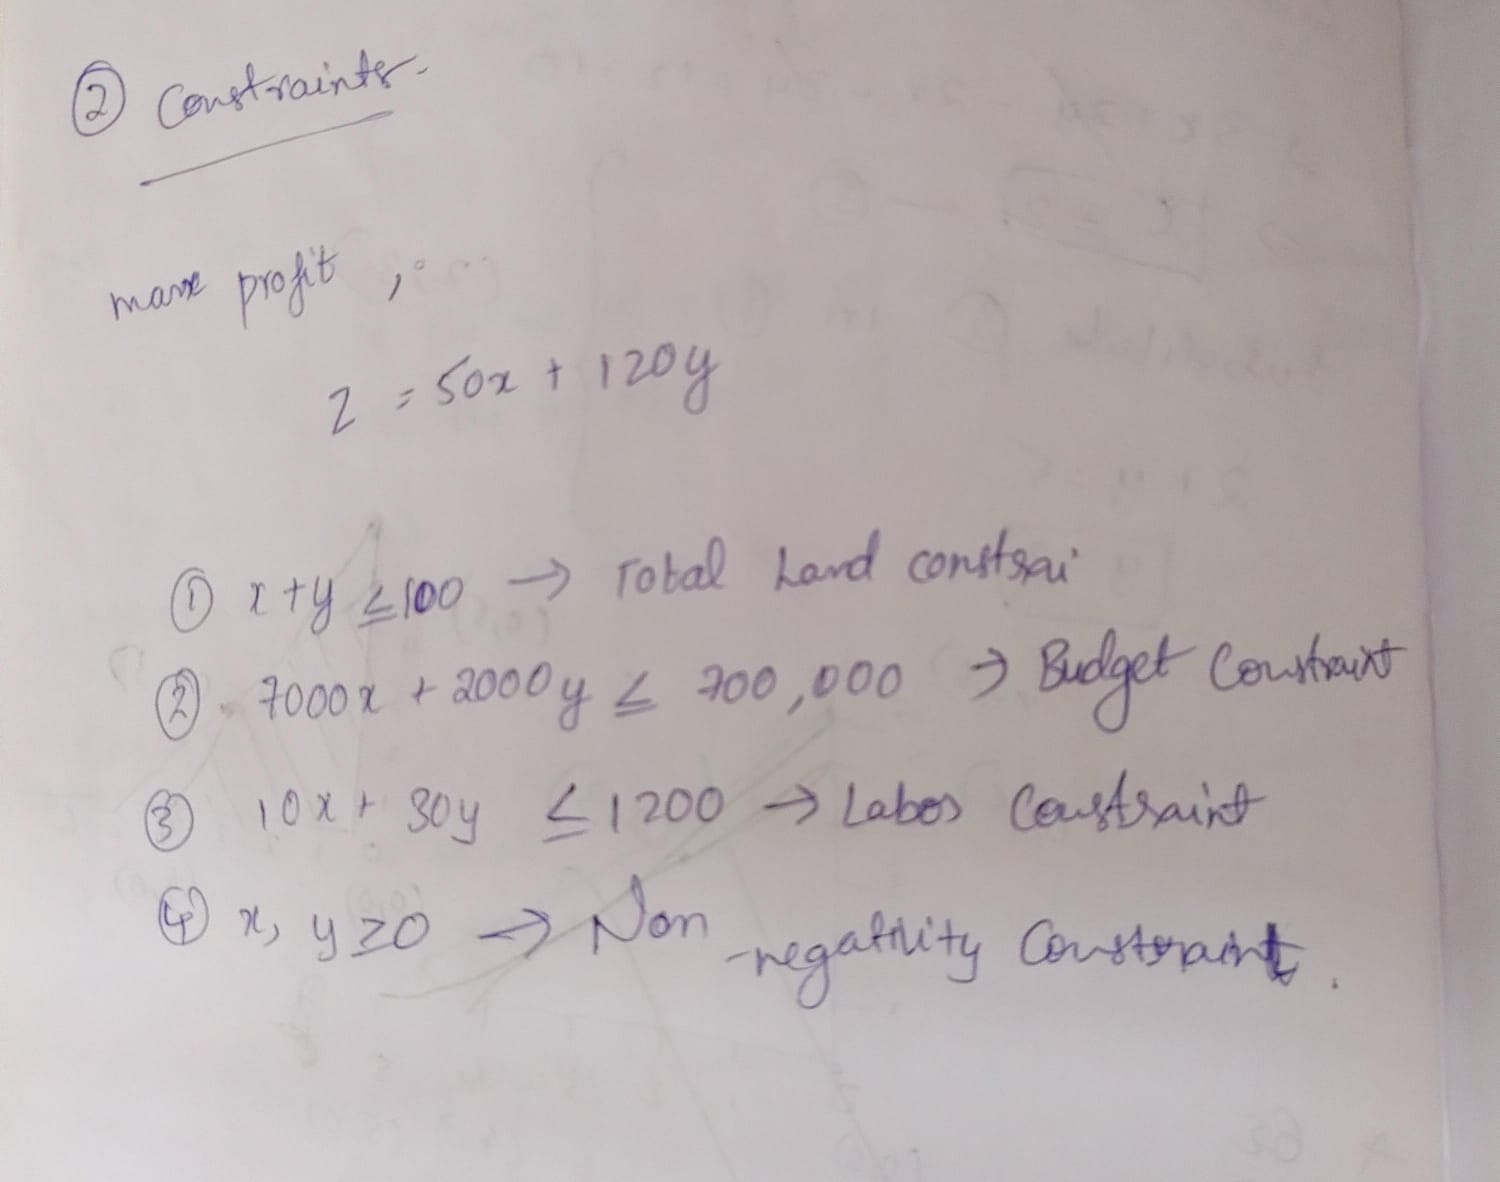